<a href="https://colab.research.google.com/github/wenjunsun/personal-machine-learning-projects/blob/master/unsupervised-learning/dimensionality-reduction/TSNE_on_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TSNE on MNIST

In [1]:
# some code borrowed from https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [57]:
mnist = fetch_openml('mnist_784')

In [166]:
X = mnist.data
y = mnist.target

In [4]:
len(X)

70000

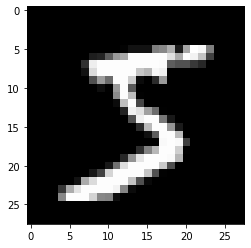

In [18]:
plt.gray()
plt.imshow(X[0].reshape(28, 28))

As we can see, each image of a handwritten digit is in 784 dimension space, we will use TSNE to map this to 2 dimension.

In [22]:
data_1000 = X[0:1000,:]
labels_1000 = y[0:1000]
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(data_1000)

In [23]:
tsne_data

array([[ 34.834747 ,   4.8745666],
       [ 34.665302 ,  30.68079  ],
       [-37.703796 ,   5.9220057],
       ...,
       [ 28.023317 ,  36.59272  ],
       [ 30.590605 ,   1.3122184],
       [  4.356418 ,  31.197184 ]], dtype=float32)

In [24]:
np.vstack((tsne_data.T, labels_1000)).T

array([[34.834747314453125, 4.874566555023193, '5'],
       [34.66530227661133, 30.680789947509766, '0'],
       [-37.70379638671875, 5.922005653381348, '4'],
       ...,
       [28.023317337036133, 36.59272003173828, '0'],
       [30.590604782104492, 1.312218427658081, '3'],
       [4.356418132781982, 31.19718360900879, '6']], dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


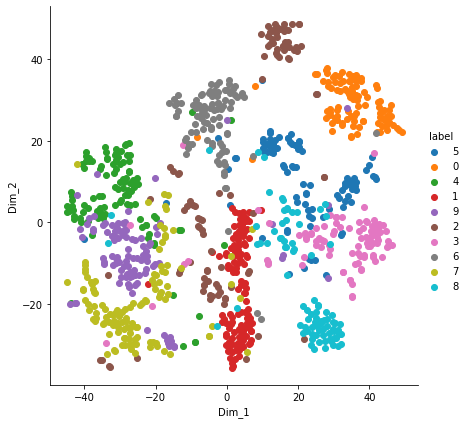

took 8.507637977600098 seconds to train TSNE


In [36]:
# 1000 data points with default parameters for TSNE
# default perplexity = 30
start_time = time.time()

data_1000 = X[0:1000,:]
labels_1000 = y[0:1000]
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(data_1000)

tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, "Dim_1", "Dim_2").add_legend()
plt.show()

end_time = time.time()
print(f'took {end_time - start_time} seconds to train TSNE')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


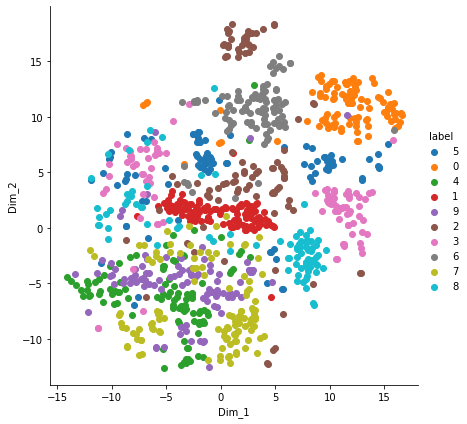

took 15.414511442184448 seconds to train TSNE


In [35]:
start_time = time.time()

data_1000 = X[0:1000,:]
labels_1000 = y[0:1000]
# perplexity 150
model = TSNE(n_components=2, random_state=0, perplexity=150)
tsne_data = model.fit_transform(data_1000)

tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, "Dim_1", "Dim_2").add_legend()
plt.show()

end_time = time.time()
print(f'took {end_time - start_time} seconds to train TSNE')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


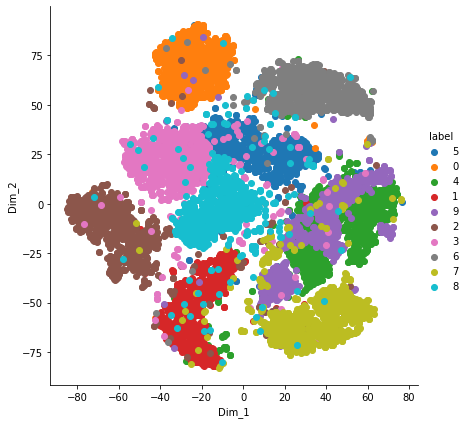

took 240.4247167110443 seconds to train TSNE


In [37]:
start_time = time.time()

data_10000 = X[0:10000,:]
labels_10000 = y[0:10000]
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(data_10000)

tsne_data = np.vstack((tsne_data.T, labels_10000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, "Dim_1", "Dim_2").add_legend()
plt.show()

end_time = time.time()
print(f'took {end_time - start_time} seconds to train TSNE')

As we can see, the TSNE can separate data points into groups very clearly and visually, this can mean that ML model can potentially perform very well on supervised learning algorithm, and that our dataset has a lot of structure.

# PCA on MNIST

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


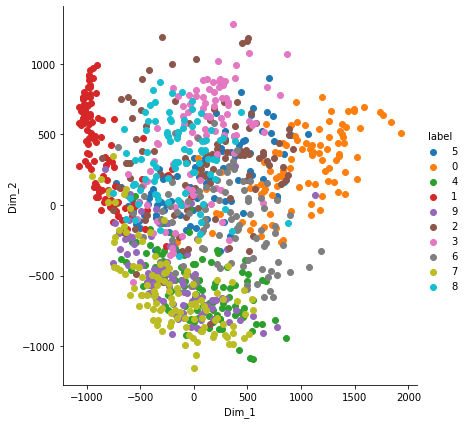

took 0.6587450504302979 seconds to train PCA


In [38]:
start_time = time.time()

data = X[:1000,:]
labels = y[:1000]
pca = PCA(n_components=2, random_state=0)
data_new = pca.fit_transform(data)

data_new = np.vstack((data_new.T, labels)).T
pca_df = pd.DataFrame(data = data_new, columns = ('Dim_1', 'Dim_2', 'label'))

sns.FacetGrid(pca_df, hue = 'label', size = 6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

end_time = time.time()
print(f'took {end_time - start_time} seconds to train PCA')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


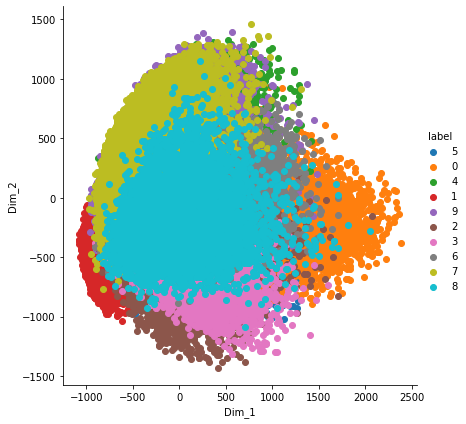

took 4.751305341720581 seconds to train PCA


In [39]:
start_time = time.time()

data = X[:,:]
labels = y[:]
pca = PCA(n_components=2, random_state=0)
data_new = pca.fit_transform(data)

data_new = np.vstack((data_new.T, labels)).T
pca_df = pd.DataFrame(data = data_new, columns = ('Dim_1', 'Dim_2', 'label'))

sns.FacetGrid(pca_df, hue = 'label', size = 6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

end_time = time.time()
print(f'took {end_time - start_time} seconds to train PCA')

As we can see, PCA is way fatser than T-SNE, in part because PCA is linear and is simple. Actually PCA is not that bad, but in terms of visualizaing clear patterns, it is not as good as T-SNE.

# PCA + TSNE in 3 dimensions

In [49]:
# TSNE
data_1000 = X[0:1000,:]
labels_1000 = y[0:1000]
model = TSNE(n_components=3, random_state=0)
tsne_data = model.fit_transform(data_1000)
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", 'Dim_3', "label"))

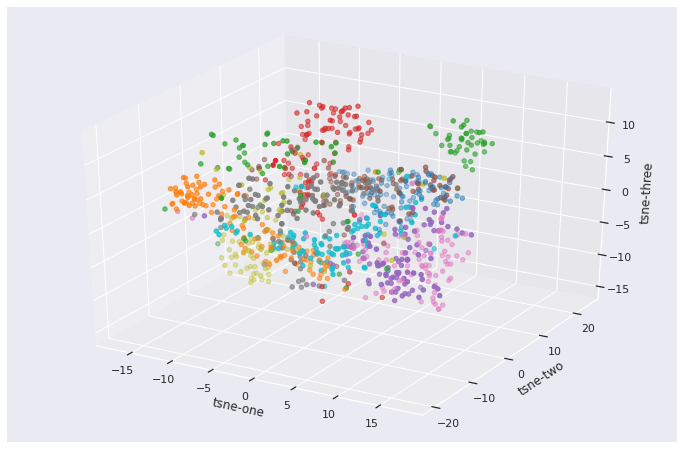

In [161]:
ax = plt.figure(figsize=(12,8)).gca(projection='3d')
ax.scatter(
    tsne_df['Dim_1'].astype('float'),
    tsne_df['Dim_2'].astype('float'),
    tsne_df['Dim_3'].astype('float'),
    c=tsne_df['label'].apply(lambda x: int(x)).values, 
    cmap='tab10'
)
ax.set_xlabel('tsne-one')
ax.set_ylabel('tsne-two')
ax.set_zlabel('tsne-three')
plt.show()

In [ ]:
# PCA
data = X[:,:]
labels = y[:]
pca = PCA(n_components=3, random_state=0)
data_new = pca.fit_transform(data)

data_new = np.vstack((data_new.T, labels)).T
pca_df = pd.DataFrame(data = data_new, columns = ('Dim_1', 'Dim_2', 'Dim_3', 'label'))

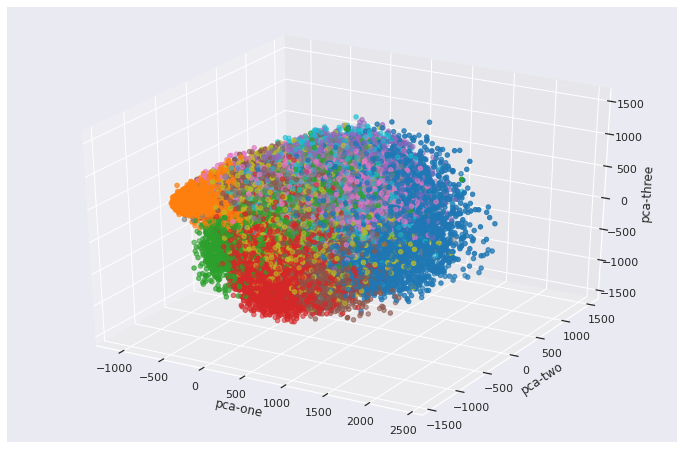

In [168]:
ax = plt.figure(figsize=(12,8)).gca(projection='3d')
ax.scatter(
    pca_df['Dim_1'].astype('float'),
    pca_df['Dim_2'].astype('float'),
    pca_df['Dim_3'].astype('float'),
    c=pca_df['label'].apply(lambda x: int(x)).values, 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()